In [2]:
import numpy as np
import matplotlib.pyplot as plt

We are trying to approximate the fourier series where we assume that the wave is periodic. In the code, I have taken the period for $[-\pi, \pi]$ and it repeats on both sides. I am trying to show that I can approximate a sqaure wave with a combination of sin wave. As I increases the number of term I get a better approximation for the sqaure wave.

---

## Square wave

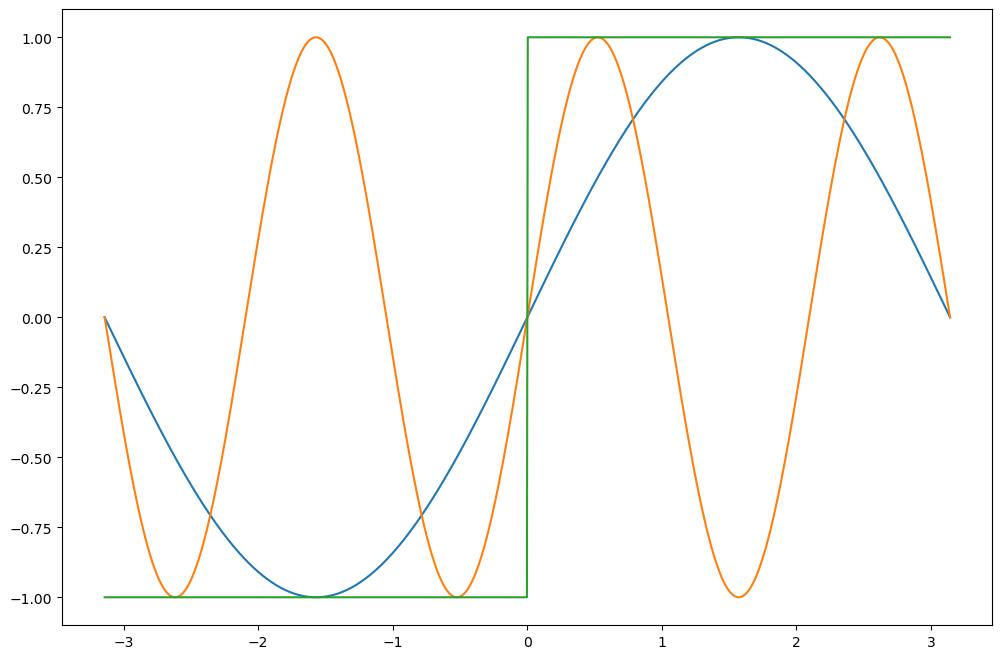

In [3]:
x = np.linspace(-np.pi, np.pi, 1000)

plt.figure(figsize=(12, 8))
plt.plot(x, np.sin(x))
plt.plot(x, np.sin(3*x))
plt.plot(x, np.sign(np.sin(x)))

I have plotted a square wave and a sin wave of the same frequency and they kind of look similar. When I increase the frequncy of the sin wave it is a poor approximation to the square wave.

The fourier series coeffitients tell us how to combine these.

$f(x) = \frac{4}{\pi} \sum_{k=1}^{\infty} \frac{\sin((2k+1)x)}{2k-1}$

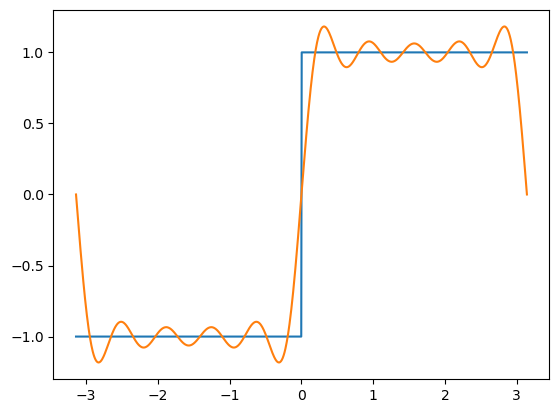

In [ ]:
## Lets try this out:
sin_x = np.sin(x)
square_wave = np.sign(sin_x)
f = 0

for k in range(5):
    f += (4/np.pi) * ((1/(2*k + 1)) * np.sin((2*k + 1) * x))

plt.plot(x, square_wave)
plt.plot(x, f)

In [107]:
def fourier_square(p, n):
    '''This implements the Fourier series approximation of the square wave. 
    The sqaure wave has a period of 2pi, from -pi, pi
    
    Parameters:
    ----------- 
    p:  1D array of x coordinates
    n: integer, number of terms required
    
    Returns:
    --------
    Fourier series approximation of a square wave of len(p)
    '''
    f = 0
    for k in range(n+1):
        f += (4/np.pi) * ((1/(2*k + 1)) * np.sin((2*k + 1) * p))
    return f

In [6]:
f = fourier_square(x, 5)
print(type(f), len(f))

<class 'numpy.ndarray'> 1000


Lets try calling this with a different number of terms and see how well we approximate the sqaure wave.

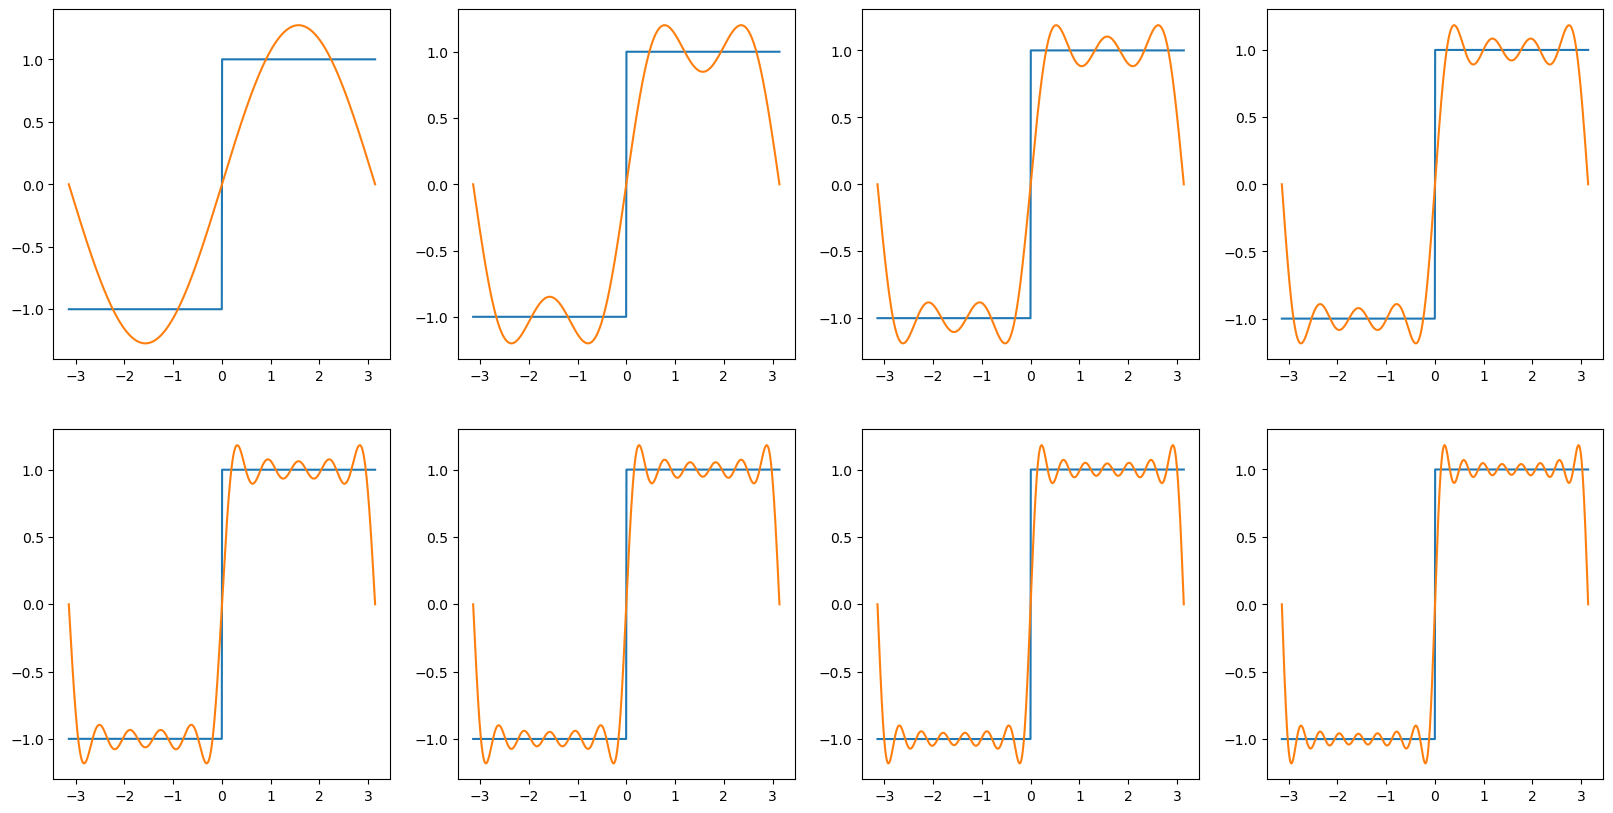

In [7]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i, xa in enumerate(ax.flat):
    f = fourier_square(x, i)
    xa.plot(x, square_wave)
    xa.plot(x, f)

As we go from a single term to 8 terms we are clearly getting closer to a sqaure wave.

However this is a qualitative observation. Lets quantify the convergence by calculating the MSE for different number of terms.

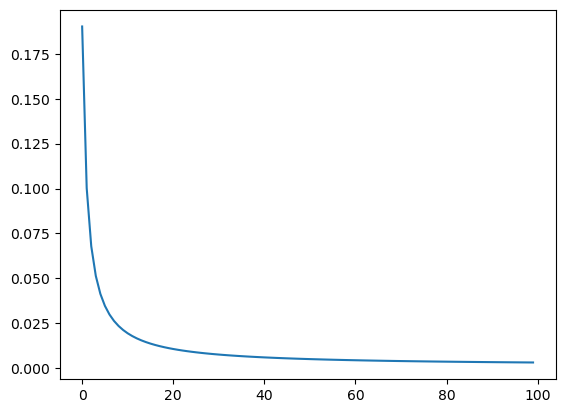

In [98]:
error_square = []
for i in range(100):
    f = fourier_square(x, i)
    b1 = np.mean((f - square_wave)**2)
    error_square.append(b1)
plt.plot(error_square)

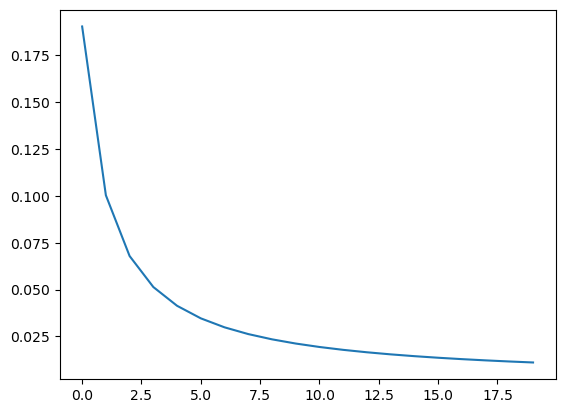

In [102]:
plt.plot(error_square[:20])

- As we increase the number of terms, the error drops.
- The initial reduction in error is very high, this levels of as the number of terms increase.
- The error does not reach zero because of the values at $-\pi$ and $\pi$.

0.002031563509433515


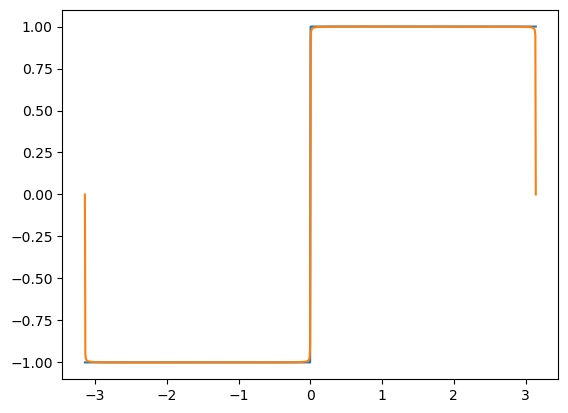

In [79]:
f = fourier_square(x, 1000)
plt.plot(x, square_wave)
plt.plot(x, f)
print(np.mean(np.square(f-square_wave)))

----

## Sawtooth wave

We generate a sawtooth simply by $f(x) = x $ in the range $[-\pi, \pi]$. Note that we have to normalize the range to $-1, 1$

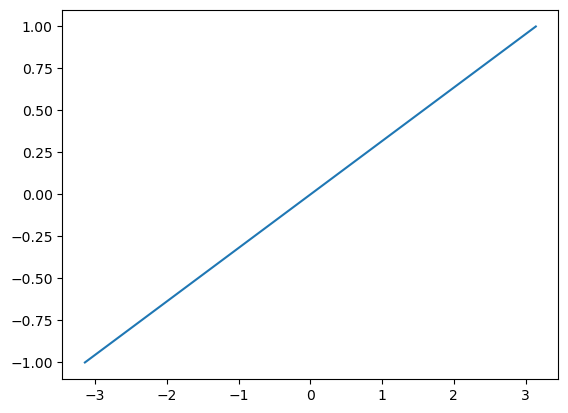

In [28]:
s2 = x  / np.pi
plt.plot(x, s2)

The series expansion of the sawtoooth is given by:

$f(x) = \frac{2}{\pi} \sum_{k=1}^{\infty} \frac{(-1)^{k+1}}{k} \sin(kx)$

In [111]:
def fourier_sawtooth(q, n1):
    '''This implements the Fourier series approximation of a sawtooth. 
    The sqaure wave has a period of 2pi, from -pi, pi
    
    Parameters:
    ----------- 
    p:  1D array of x coordinates
    n: integer, number of terms required
    
    Returns:
    --------
    Fourier series approximation of a sawtooth of len(q)
    '''
    f = 0
    for k in range(1, n1 + 1):
        f += (2/np.pi) * ((-1)**(k+1) / k) * np.sin(k * q)
    return f

In [19]:
f = fourier_sawtooth(x, 5)
print(type(f), len(f))

<class 'numpy.ndarray'> 1000


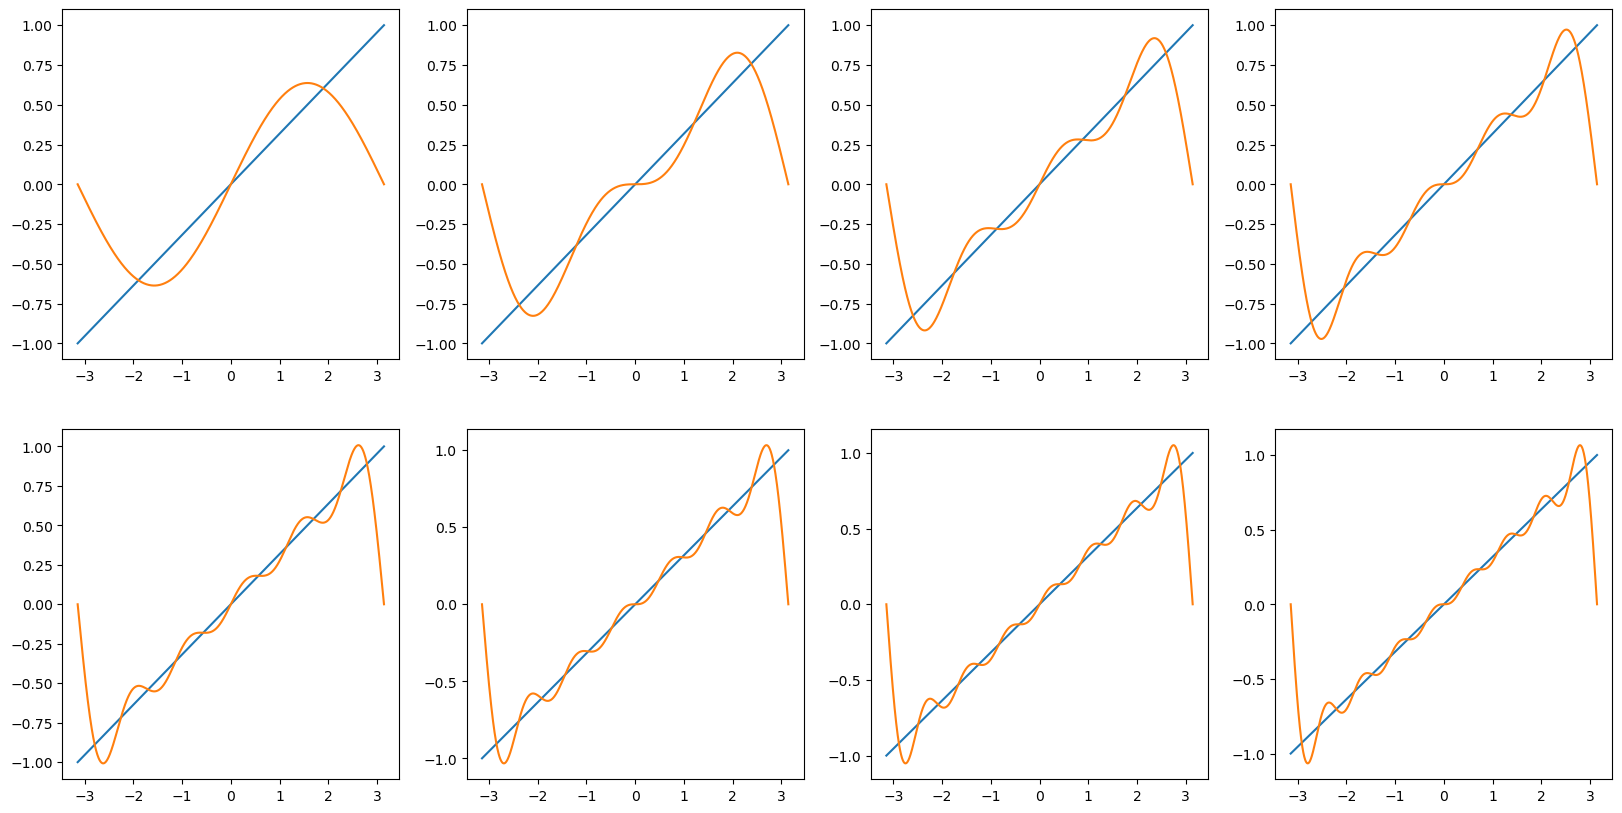

In [86]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i, xa in enumerate(ax.flat):
    f = fourier_sawtooth(x, i + 1)
    xa.plot(x, s2)
    xa.plot(x, f)

Similar to the sqaure wave, as we increase the number of terms, we get a better approximation.

As before, we can calculate the error:

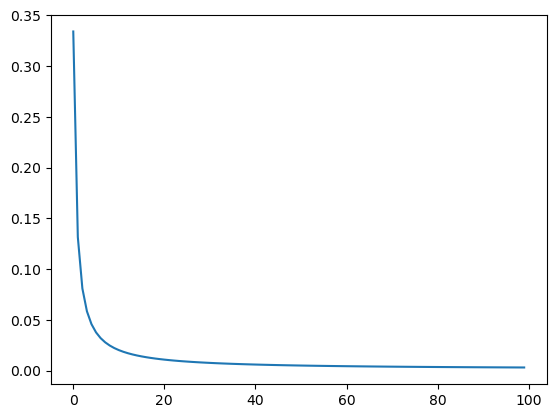

In [99]:
error_sawtooth = []
for i in range(100):
    f = fourier_sawtooth(x, i)
    b1 = np.mean((f - s2)**2)
    error_sawtooth.append(b1)
plt.plot(error_sawtooth)

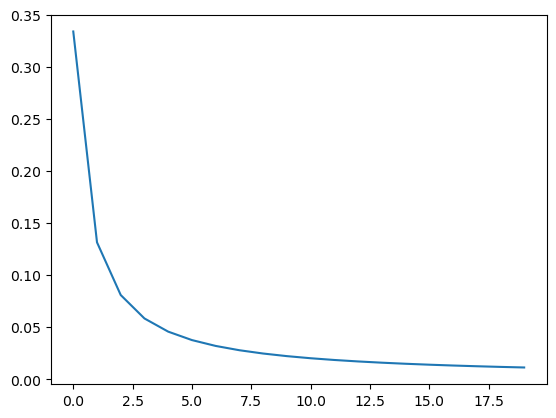

In [110]:
plt.plot(error_sawtooth[:20])

THe obervations from the error for the sqaure wave approximation hold here as well.

0.002031664120068628


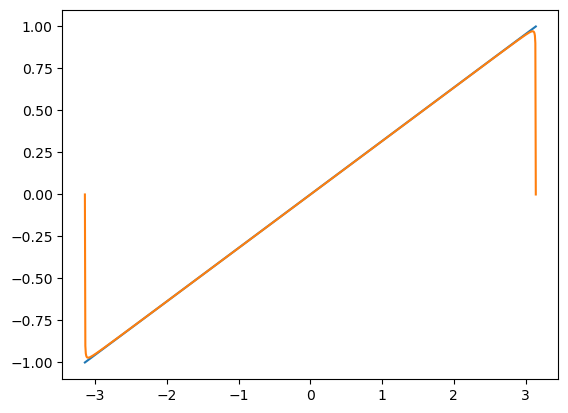

In [90]:
f = fourier_sawtooth(x, 1000)
plt.plot(x, s2)
plt.plot(x, f)
print(np.mean(np.square(f-s2)))

----
## Triangle wave

We generate a triangle simply by $f(x) = |x| $ in the range $[-\pi, \pi]$. Note that we have to normalize the range to $-1, 1$

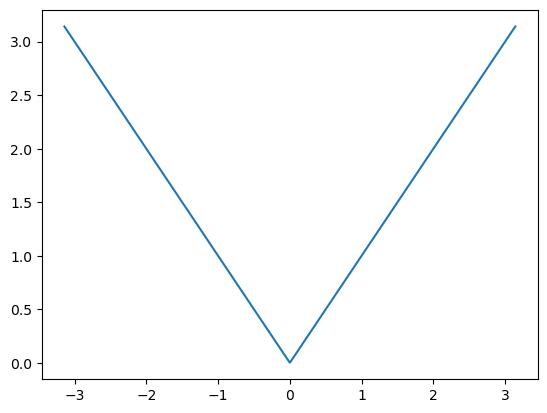

In [57]:
triangle = np.abs(x)
plt.plot(x, triangle)

The series expansion of the sawtoooth is given by:

$f(x) = \frac{\pi}{2} - \frac{4}{\pi} \sum_{k=1}^{\infty} \frac{\cos((2k-1)r)}{(2k-1)^2}$

In [113]:
def fourier_triangle(r, n1):
    f = 0
    '''This implements the Fourier series approximation of a triangle. 
    The sqaure wave has a period of 2pi, from -pi, pi
    
    Parameters:
    ----------- 
    p:  1D array of x coordinates
    n: integer, number of terms required
    
    Returns:
    --------
    Fourier series approximation of a triangle of len(r)
    '''
    for k in range(1, n1 + 1):
        f += (4/np.pi) * ((1/(2*k - 1)**2) * np.cos((2*k - 1) * r))
    f = np.pi/2 - f
    return f

In [40]:
f = fourier_triangle(x, 5)
print(type(f), len(f))

<class 'numpy.ndarray'> 1000


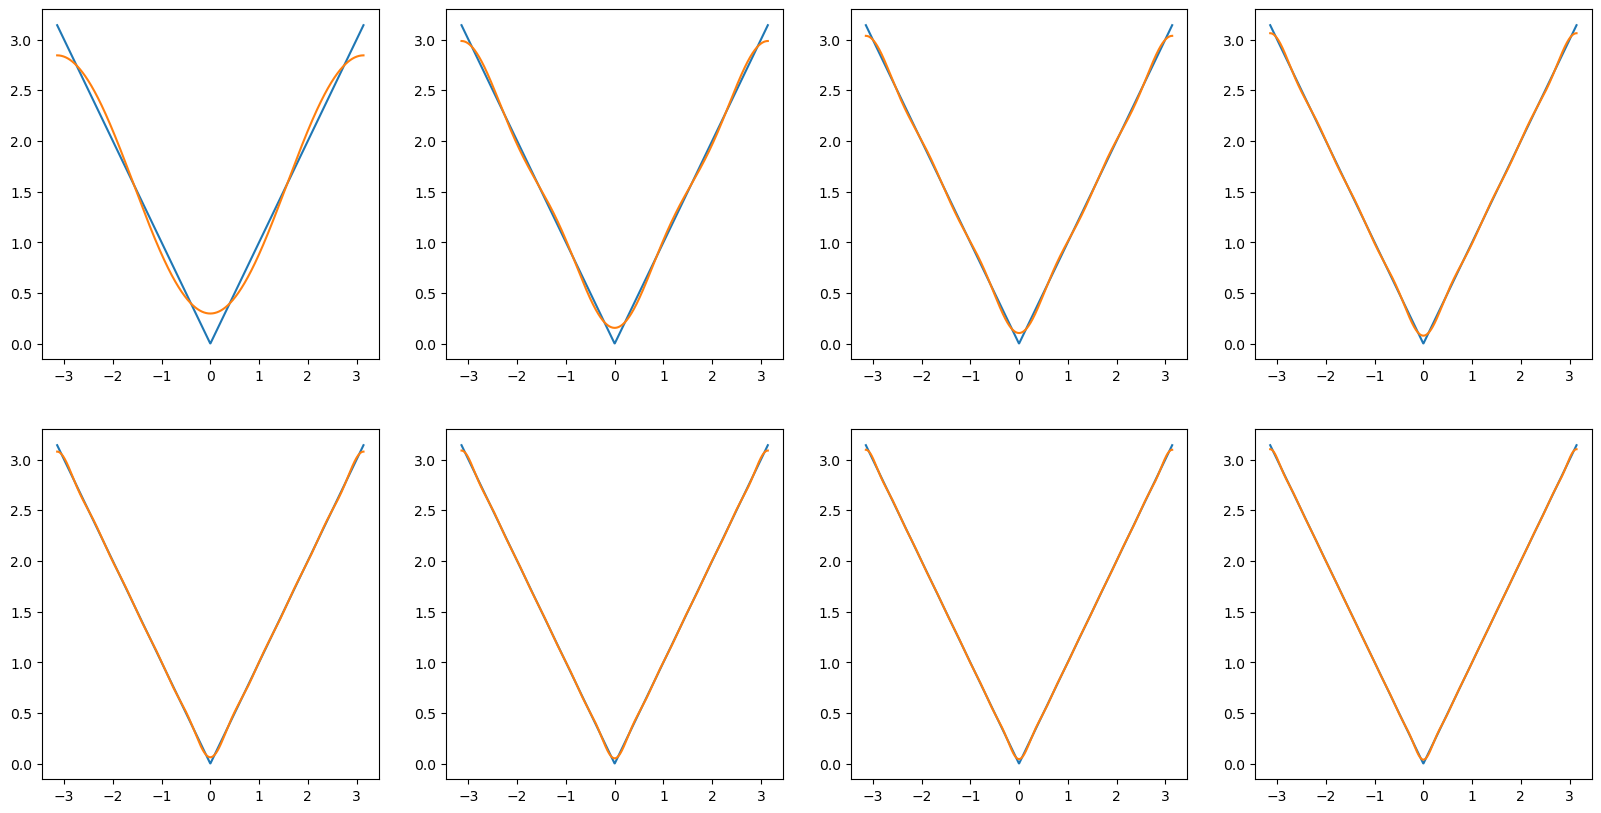

In [59]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i, xa in enumerate(ax.flat):
    f = fourier_triangle(x, i + 1)
    xa.plot(x, triangle)
    xa.plot(x, f)

Similar to the sqaure wave, as we increase the number of terms, we get a better approximation.

As before, we can calculate the error:

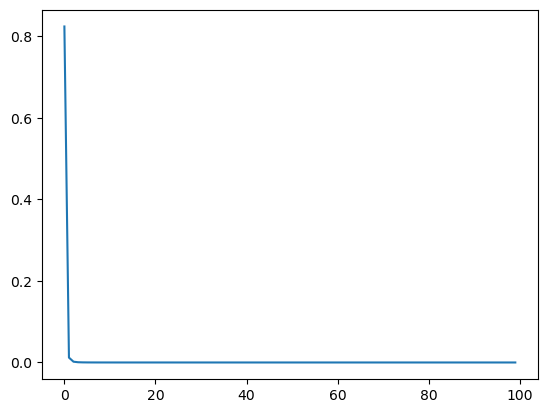

In [96]:
error_triangle = []
for i in range(100):
    f = fourier_triangle(x, i)
    b1 = np.mean((f - triangle)**2)
    error_triangle.append(b1)
plt.plot(error_triangle)

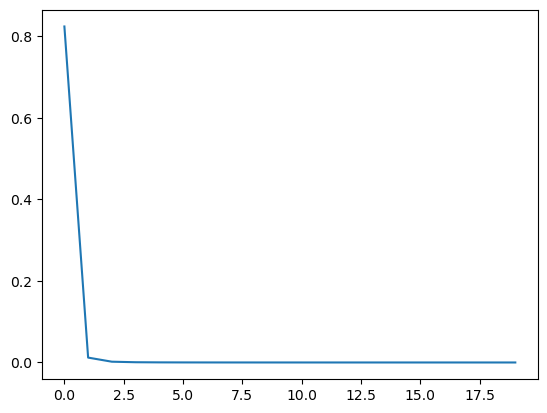

In [114]:
plt.plot(error_triangle[:20])

2.0304165795131465e-10


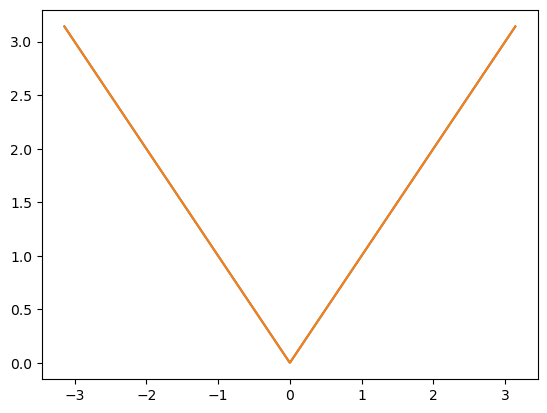

In [94]:
f = fourier_triangle(x, 1000)
plt.plot(x, triangle)
plt.plot(x, f)
print(np.mean(np.square(f-triangle)))

----

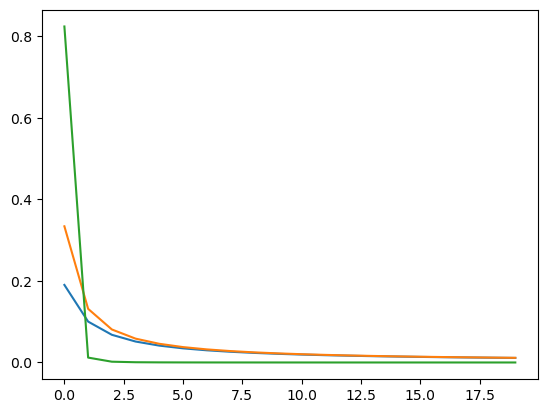

In [101]:
plt.plot(error_square[:20])
plt.plot(error_sawtooth[:20])
plt.plot(error_triangle[:20])

When we look at the error in these series we see that the error reduces as `n` increases. However, the error of the triangle wave reduces faster than the square and sawtooth waves. This is because the terms in the triangle wave's Fourier series have a $n^2$ term in the denominator. With just the first few terms, the triangle wave reaches 0 faster. We can see this on the graphs